# Loan data from prosper

## By Swathi P

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

>In this data analysis we will be looking at factors which affect a loan’s outcome status?

In [55]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [56]:
#Loading dataset into a pandas dataframe:
df_master=pd.read_csv('prosperLoanData.csv')
df_master.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/09 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/09 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [57]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [58]:
df_master.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [59]:
#copying dataframe for assessing and cleaning data
df=df_master.copy()
df.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/09 0:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [60]:
df.LoanStatus.value_counts() 

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

There are 12 categories for LoanStatus.Making all Past Due status into one category and
There are few finalpaymentinprogress so it can be joined into completed status for our analysis.

In [61]:
def status_group(data):
    '''Takes data and checks if there is past and will return as Past Due else if FinalPaymentInProgress returns as completed else data as is'''
    if 'Past' in data:
        return 'Past Due'
    elif 'FinalPaymentInProgress' in data:
        return 'Completed'
    else:
        return data
    
df.LoanStatus=df.LoanStatus.apply(status_group)

#There are only 5 entries for cancelled status,so removing those from our dataframe
df=df[df.LoanStatus!='Cancelled'] 
df.LoanStatus.value_counts()    

Current       56576
Completed     38279
Chargedoff    11992
Defaulted      5018
Past Due       2067
Name: LoanStatus, dtype: int64

In [62]:
df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [63]:
df['EmploymentStatus'].fillna(value='Not available',inplace=True);
df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

In [64]:
df.IncomeRange.value_counts()

$25,000-49,999    32191
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7737
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [65]:
df.IsBorrowerHomeowner.value_counts()

True     57476
False    56456
Name: IsBorrowerHomeowner, dtype: int64

In [66]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26354
Not available     7598
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [67]:
df.TotalProsperLoans.value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

In [68]:
df.IncomeVerifiable.value_counts()

True     105264
False      8668
Name: IncomeVerifiable, dtype: int64

In [69]:
df.DebtToIncomeRatio.value_counts().head(5)

0.18    4132
0.22    3687
0.17    3616
0.14    3553
0.20    3481
Name: DebtToIncomeRatio, dtype: int64

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others. This analysis will majorly focus on factors which affect a loan’s outcome status.
> We will be looking into the following factors for predicting loan status outcome:
>
> 1.LoanStatus  
>
> 2.EmploymentStatus
>
> 3.BorrowerAPR
>
> 4.ProsperScore
>
> 5.DebtToIncomeRatio
>
> 6.LoanOriginalAmount
>
> 7.IncomeRange
>
> 8.IsBorrowerHomeowner
>
> 9.IncomeVerifiable


## Univariate Exploration

#### 1. LoanStatus

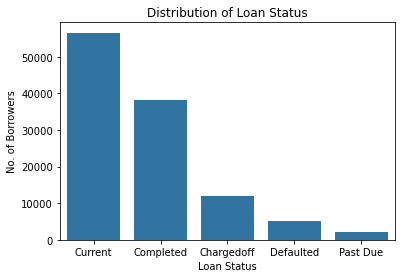

In [70]:
default_color=sb.color_palette()[0]
order=df.LoanStatus.value_counts().index
sb.countplot(data=df,x='LoanStatus',order=order,color=default_color);
plt.xlabel('Loan Status')
plt.ylabel('No. of Borrowers')
plt.title('Distribution of Loan Status');

Most of the loan status falls under current and completed.

#### 2. EmploymentStatus

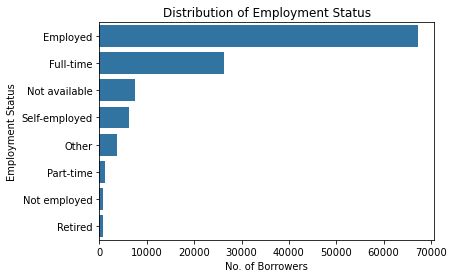

In [71]:
order=df.EmploymentStatus.value_counts().index
sb.countplot(data=df,y='EmploymentStatus',color=default_color,order=order);
plt.ylabel('Employment Status')
plt.xlabel('No. of Borrowers')
plt.title('Distribution of Employment Status');

Most of the borrowers are Employed and Full-time workers.

#### 3. BorrowerAPR

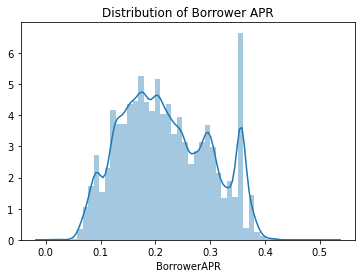

In [72]:
sb.distplot(df['BorrowerAPR']);
plt.title('Distribution of Borrower APR');

BorrowerAPR lies mostly between the range 0.1 to 0.3

#### 4.ProsperScore

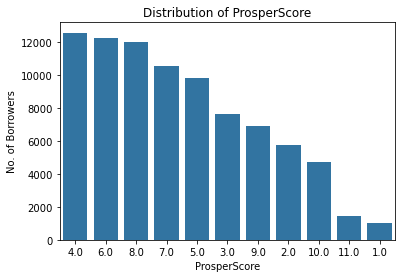

In [73]:
order=df.ProsperScore.value_counts().index
sb.countplot(data=df,x='ProsperScore',order=order,color=default_color);
plt.xlabel('ProsperScore')
plt.ylabel('No. of Borrowers')
plt.title('Distribution of ProsperScore');

We can observe that 4,6 and 8 are the prosperscores obtained by most of the borrowers.A prosperscore of 10 is the best.

#### 5. DebtToIncomeRatio

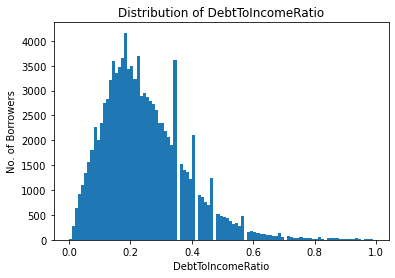

In [74]:
bins=np.arange(0,1,0.01)
plt.hist(data=df,x='DebtToIncomeRatio',color=default_color,bins=bins);
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('No. of Borrowers')
plt.title('Distribution of DebtToIncomeRatio');

The distribution of the DebtToIncomeRatio shows that most of the borrowers DebtToIncomeRatio lies between 0 to 0.6

#### 6. IncomeRange

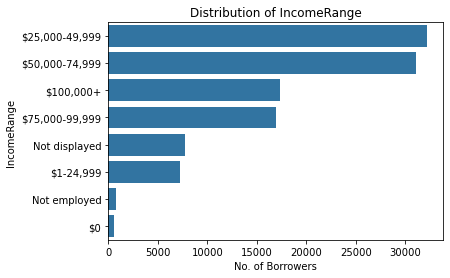

In [75]:
order=df.IncomeRange.value_counts().index
sb.countplot(data=df,y='IncomeRange',color=default_color,order=order);
plt.ylabel('IncomeRange ')
plt.xlabel('No. of Borrowers')
plt.title('Distribution of IncomeRange');

An income range of $25000-49999 and $50000-99999 has majority of borrowers.

#### 7. LoanOriginalAmount

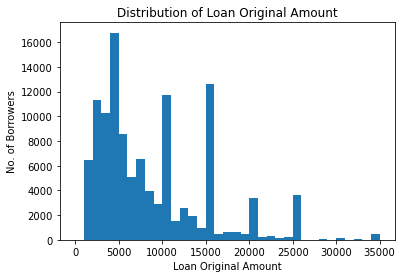

In [76]:
bins=np.arange(0,df['LoanOriginalAmount'].max()+1000,1000)
plt.hist(data=df,x='LoanOriginalAmount',bins=bins);
plt.xlabel('Loan Original Amount')
plt.ylabel('No. of Borrowers')
plt.title('Distribution of Loan Original Amount');

We can clearly observe that,there are peak counts at 5000,10000,15000 loan amounts.

#### 8. IsBorrowerHomeowner

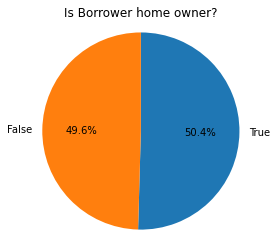

In [77]:
counts=df.IsBorrowerHomeowner.value_counts()
labels=counts.index
plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90,counterclock=False)
plt.axis('square');
plt.title('Is Borrower home owner?');

Almost 50% of borrowers own home and other 50% doesn't own homes.Let us see whether this has any difference with loan status.

#### 9. IncomeVerifiable

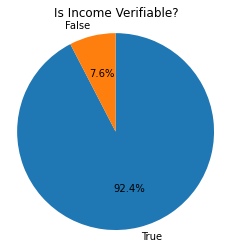

In [78]:
counts=df.IncomeVerifiable.value_counts()
labels=counts.index
plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90,counterclock=False)
plt.axis('square');
plt.title('Is Income Verifiable?');

92.4% of the customers have verified thier income.

### Summary of Univariate Exploration:
> Most of the loan status falls under current and completed and most of the borrowers are either Employed and Full-time workers.
>
>BorrowerAPR lies mostly between the range 0.1 to 0.3.An income range of 25000−49999 and 50000-99999 has majority of borrowers.
>
>The distribution of the DebtToIncomeRatio lies mostly between 0 to 1 .So I had set the x axis limit for analysis.Itshows that most of the borrowers DebtToIncomeRatio lies between 0 to 0.6.

> As there are many past due categories in the loan status ,I made all the past due categories into one category for easy analysis.
>
>A prosperscore of 10 is the best.We can observe that 4,6 and 8 are the prosperscores obtained by most of the borrowers.Very few borrowers have a prosperscore of 10.

## Bivariate Exploration

In [79]:
Variables=['ProsperScore','IncomeRange','DebtToIncomeRatio','LoanOriginalAmount','BorrowerAPR','LoanStatus','IsBorrowerHomeowner','IncomeVerifiable','EmploymentStatus']
numerical_vars=['ProsperScore','IncomeRange','DebtToIncomeRatio','LoanOriginalAmount','BorrowerAPR','LoanStatus']

#### 1. Correlation between numerical variables

Let us check correlation between our variables of interest.

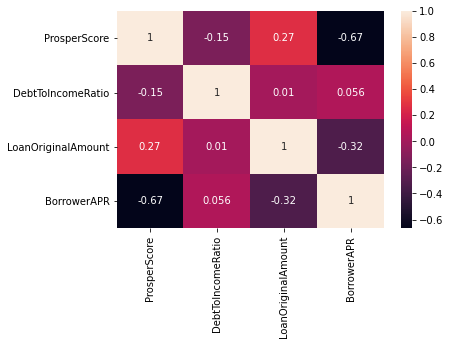

In [80]:
sb.heatmap(df[numerical_vars].corr(),annot=True);

1.There is a negative correlation between Borrower APR and LoanOriginalAmount.The higher the loan amount the lesser the borrower apr.

2.There is a negative correlation between ProsperScore and BorrowerAPR and also DebtToIncomeRatio and ProsperScore

#### 2. Relationship between LoanStatus and ProsperScore

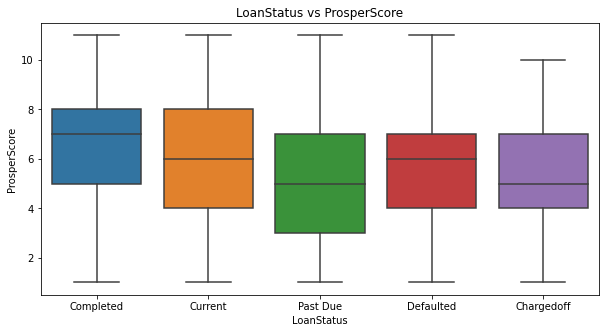

In [81]:
plt.figure(figsize=[10,5])
sb.boxplot(data=df,x='LoanStatus',y='ProsperScore');
plt.title('LoanStatus vs ProsperScore');

Looking at the ProsperScores for the loan status categories,we can observe that completed loans have higher proper scores than others.Smiliarly,PastDue loans have lower prosper scores.

#### 3. Relationship between LoanStatus and DebtToIncomeRatio

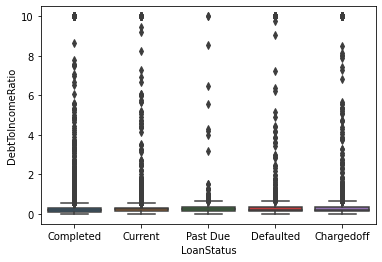

In [82]:
sb.boxplot(data=df,x='LoanStatus',y='DebtToIncomeRatio');

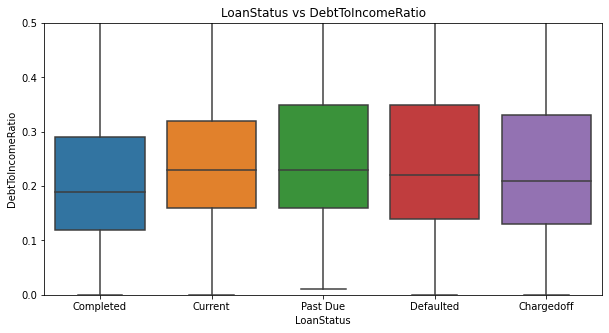

In [83]:
plt.figure(figsize=[10,5])
sb.boxplot(data=df,x='LoanStatus',y='DebtToIncomeRatio');
plt.ylim(0,0.5);
plt.title('LoanStatus vs DebtToIncomeRatio');

PastDue,Defaulted and Chargedoff loans have higher DebtToIncomeRatio than current and completed.

#### 4. Relationship between LoanStatus and EmploymentStatus

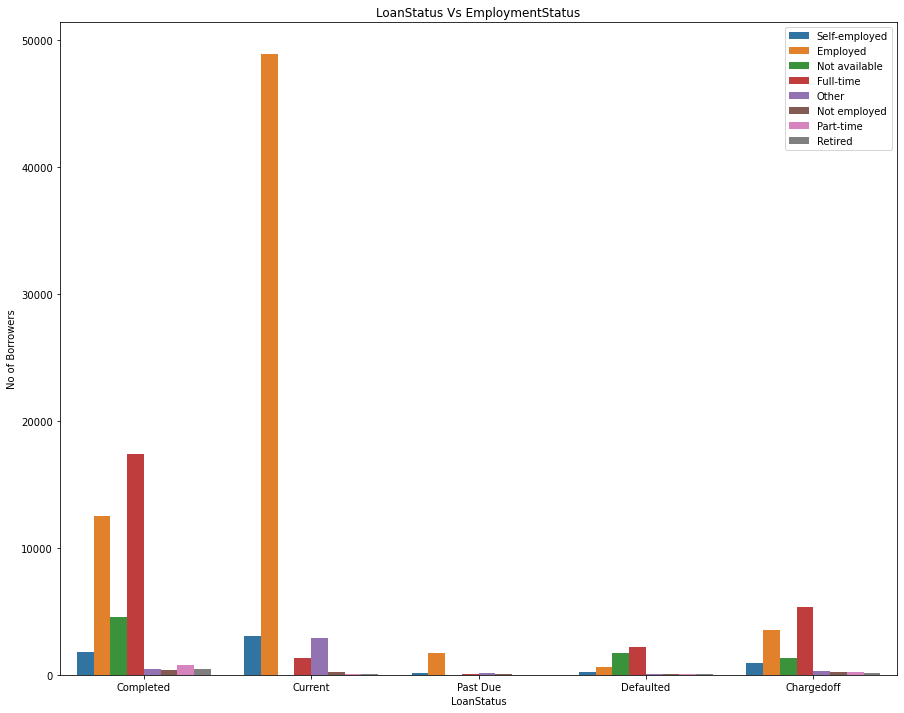

In [84]:
plt.figure(figsize=(15,12))
sb.countplot(data=df,x='LoanStatus',hue='EmploymentStatus');
plt.legend(loc=1);
plt.ylabel('No of Borrowers')
plt.title('LoanStatus Vs EmploymentStatus');

Full-time and employed borrowers are the most frequent borrowers for Chargedoff and defaulted loans,at the same time we can also observe that these category borrowers are the most who have completed the loans.

Will this interpretation change with Borrower APR? Let's check it later in our analysis.

#### 5. Relationship between LoanStatus and IncomeRange

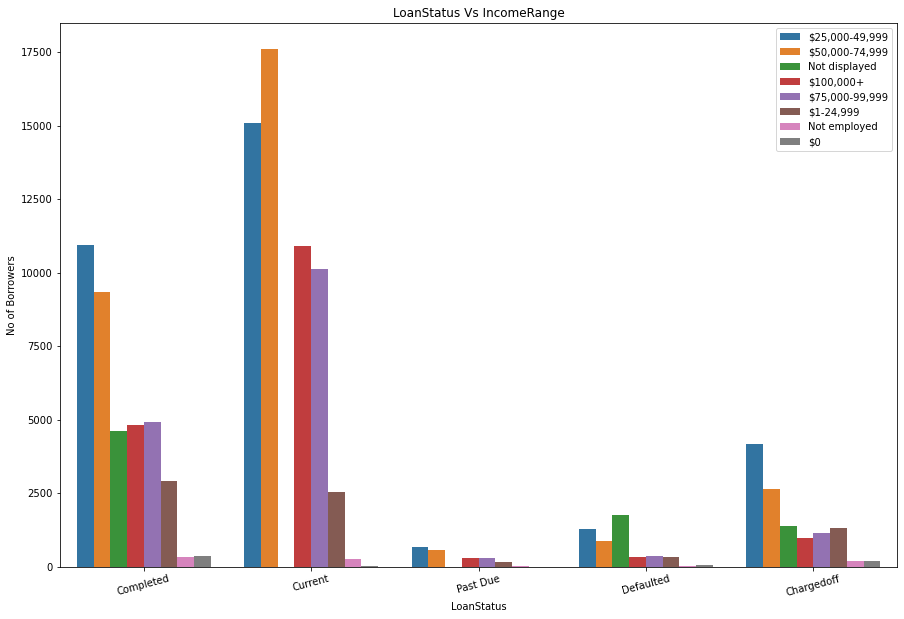

In [85]:
plt.figure(figsize=(15,10))
sb.countplot(data=df,x='LoanStatus',hue='IncomeRange');
plt.xticks(rotation=15)
plt.legend(loc=1);
plt.ylabel('No of Borrowers');
plt.title('LoanStatus Vs IncomeRange');

As we saw earlier in our univariate analysis of Income range 25000-49999 and  50000-99999 have more number of customers.Those with 25000-49999 income range have PastDue,Defaulted and Chargedoff loans,but they are the borrowers who have also completed maximum of the loans followed by $  50000-99999 rincome range borrowers. 

#### 6. Relationship between LoanStatus and LoanOriginalAmount

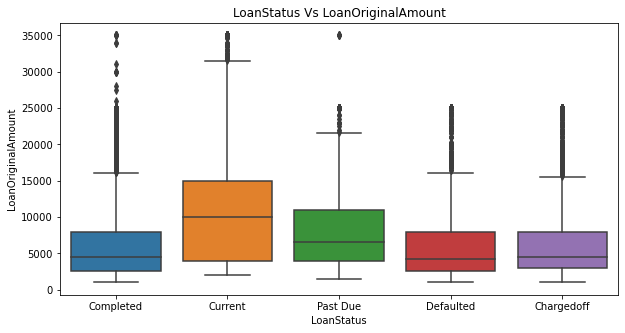

In [86]:
plt.figure(figsize=[10,5])
sb.boxplot(data=df,x='LoanStatus',y='LoanOriginalAmount');
plt.title('LoanStatus Vs LoanOriginalAmount');

Current loan Borrowers have higher Loan amounts than others.It is then followed by Past due loan borrowers.

Completed loans have smaller laon original amounts? Let's checck whether this Will this depend on IsBorrowerHomeOwner?

#### 7. Relationship between LoanStatus and IsBorrowerHomeowner

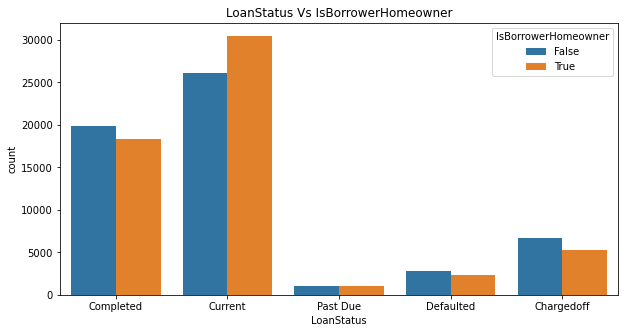

In [87]:
plt.figure(figsize=[10,5])
sb.countplot(data=df,x='LoanStatus',hue='IsBorrowerHomeowner');
plt.title('LoanStatus Vs IsBorrowerHomeowner');

As we have seen earlier in our analysis,Equal proportions of borrowers either own home or not.Borrowers who doesn't own home have Completed loans slightly higher than who own homes.Pastdue,defaulted and chargedoff loans have more number of borrowers who doesn't have home.Only current loan borrowers have more number of borrowers who own homes.

#### 8. Relationship between LoanStatus and BorrowerAPR

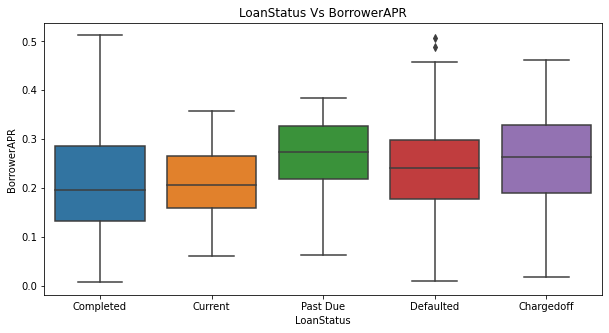

In [88]:
plt.figure(figsize=[10,5])
sb.boxplot(data=df,x='LoanStatus',y='BorrowerAPR');
plt.title('LoanStatus Vs BorrowerAPR');

Among all the categories of loan status,completed loans have lower BorrowerAPR.PastDue loanshave higher Borrower APR.

#### 9. Relationship between EmploymentStatus and BorrowerAPR

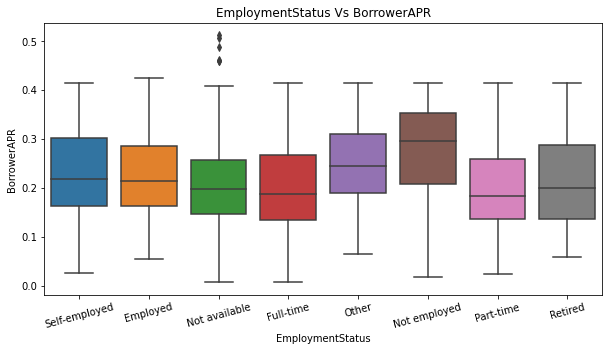

In [89]:
plt.figure(figsize=[10,5])
sb.boxplot(data=df,x='EmploymentStatus',y='BorrowerAPR');
plt.xticks(rotation=15);
plt.title('EmploymentStatus Vs BorrowerAPR');

The highest BorrowerAPR is for borrowers who are not employed,followed by Other borrowers.Retired and Part-time employees have slightly lower rates than employed borrowers.

### Summary of Bivariate Exploration:

>Borrower APR and LoanOriginalAmount have a negative correlation,which means,the higher the loan amount the lesser the borrower apr.There is a negative correlation between ProsperScore and BorrowerAPR and also DebtToIncomeRatio and ProsperScore.
>
>ProsperScores are low for PastDue loans and higher for completed loans.
>
>PastDue,Defaulted and Chargedoff loans have higher DebtToIncomeRatio than current and completed.
>
>Full-time and employed borrowers are the most frequent borrowers for Chargedoff and defaulted loans,at the same time we can also observe that these category borrowers are the most who have completed the loans.
>
>Those with 25000-49999 income range have PastDue,Defaulted and Chargedoff loans,but they are the borrowers who have also completed maximum of the loans followed by 50000-99999 rincome range borrowers.
>
>Current loan Borrowers have higher Loan amounts than others.
>
>Borrowers who doesn't own home have Completed loans slightly higher than who own homes.Pastdue,defaulted and chargedoff loans have more number of borrowers who doesn't have home.Only current loan borrowers have more number of borrowers who own homes.
>
>Among all the categories of loan status,completed loans have lower BorrowerAPR.PastDue loans have higher Borrower APR.
>
>The highest BorrowerAPR is for borrowers who are not employed,followed by Other borrowers.Retired and Part-time employees have slightly lower rates than employed borrowers.


## Multivariate Exploration

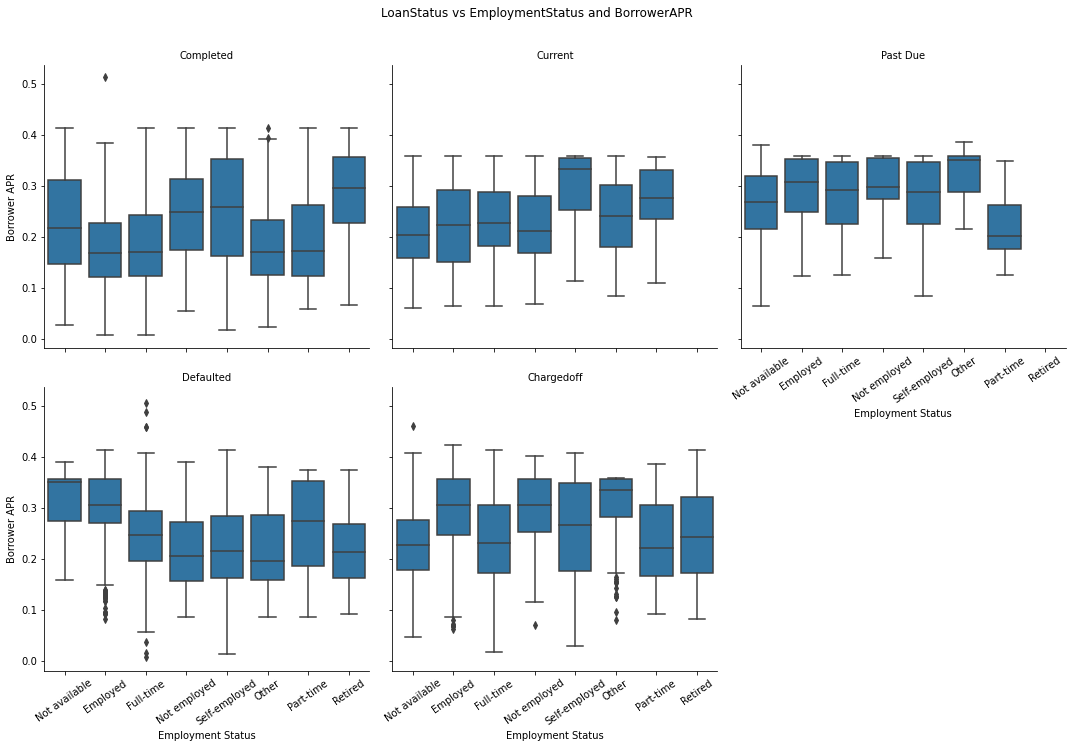

In [90]:
g=sb.FacetGrid(data=df,col='LoanStatus',col_wrap=3,size=5,margin_titles=True)
g.map(sb.boxplot,'EmploymentStatus','BorrowerAPR');
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(35);
plt.suptitle('LoanStatus vs EmploymentStatus and BorrowerAPR');
g.set_titles('{col_name}')
g.set_xlabels('Employment Status');
g.set_ylabels('Borrower APR');
plt.subplots_adjust(top=0.9);

For completed and current loans, borrowers who are employed have lower Borrower APR compartively than others.
PastDue loans have higher borrower apr,especially for those whose employment status is others and not employed.
In contrast to completed loans,for Defaulted loans,employed borrowers have higher Borrower APR.
Chargedoff loans also have higher Borrower APR,mainly for borrowers who are employed and not employed.

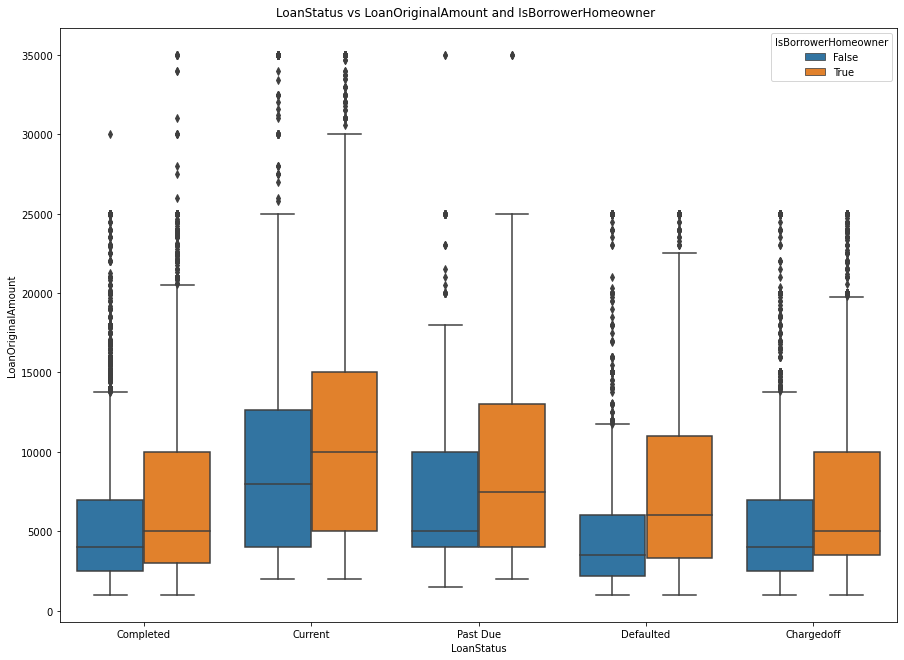

In [91]:
plt.figure(figsize=[15,10])
sb.boxplot(data=df,x='LoanStatus',y='LoanOriginalAmount',hue='IsBorrowerHomeowner');
plt.suptitle('LoanStatus vs LoanOriginalAmount and IsBorrowerHomeowner');
plt.subplots_adjust(top=0.95);

From the plot,we can interpret that for every loan status category borrowers who own homes have higher loan amounts than borrowers who doesn't own homes.

### Summary of Findings

1.Most of the loan status falls under current and completed and most of the borrowers are either Employed and Full-time workers.

2.BorrowerAPR lies mostly between the range 0.1 to 0.3.An income range of 25000−49999 and 50000-99999 has majority of borrowers.

3.The distribution of the DebtToIncomeRatio lies mostly between 0 to 1 .Most of the borrowers DebtToIncomeRatio lies between 0 to 0.6.

4.Prosperscores of 4,6,8 are obtained by most of the borrowers.Very few borrowers have a prosperscore of 10.

5.Borrower APR and LoanOriginalAmount have a negative correlation,which means,the higher the loan amount the lesser the borrower apr.

6.ProsperScores are low for PastDue loans and higher for completed loans.

7.PastDue,Defaulted and Chargedoff loans have higher DebtToIncomeRatio than current and completed.

8.Full-time and employed borrowers are the most frequent borrowers for Chargedoff and defaulted loans,at the same time we can also observe that these category borrowers are the most who have completed the loans.

9.Those with 25000-49999 income range have PastDue,Defaulted and Chargedoff loans,but they are the borrowers who have also completed maximum of the loans followed by 50000-99999 income range borrowers.

10.Current loan Borrowers have higher Loan amounts than others.

11.Borrowers who doesn't own home have Completed loans slightly higher than who own homes.Pastdue,defaulted and chargedoff loans have more number of borrowers who doesn't have home.Only current loan borrowers have more number of borrowers who own homes. Among all the categories of loan status,completed loans have lower BorrowerAPR.PastDue loans have higher Borrower APR.

12.The highest BorrowerAPR is for borrowers who are not employed,followed by Other borrowers.Retired and Part-time employees have slightly lower rates than employed borrowers.

13.For completed and current loans, borrowers who are employed have lower Borrower APR compartively than others.
PastDue loans have higher borrower apr,especially for those whose employment status is others and not employed.
In contrast to completed loans,for Defaulted loans,employed borrowers have higher Borrower APR.
Chargedoff loans also have higher Borrower APR,mainly for borrowers who are employed and not employed.

14.From the plot,we can interpret that for every loan status category borrowers who own homes have higher loan amounts than borrowers who doesn't own homes.

### Key Insights for Presentation

As we are predicting what factors affect the Loan status of a borrower,i started looking at individual variables like LoanStatus,EmploymentStatus,BorrowerAPR,ProsperScore,DebtToIncomeRatio,LoanOriginalAmount,IncomeRange,IsBorrowerHomeowner and IncomeVerifiable.

ProsperScores are low for PastDue loans and higher for completed loans.

PastDue,Defaulted and Chargedoff loans have higher DebtToIncomeRatio than current and completed.

For completed and current loans, borrowers who are employed have lower Borrower APR compartively than others.
PastDue loans have higher borrower apr,especially for those whose employment status is others and not employed.

Borrower APR and LoanOriginalAmount have a negative correlation.

In contrast to completed loans,for Defaulted loans,employed borrowers have higher Borrower APR.
Chargedoff loans also have higher Borrower APR,mainly for borrowers who are employed and not employed.

From the plot,we can interpret that for every loan status category borrowers who own homes have higher loan amounts than borrowers who doesn't own homes.

